In [1]:
#Import of all the necessary libraries
import pandas as pd
from shroomdk import ShroomDK
import json
import numpy as np
import seaborn as sns
from datetime import datetime
from datetime import date
from matplotlib import pyplot as plt

In [2]:
#Import of the transactions file
Df = pd.read_pickle("C:/Users/vlist/.vscode/GitHub/Data-analysis/EVMExport_DfTransfer.pkl")

In [3]:
#Flattening of the column containing the event data which is in a JSON format and then extraction of the value which corresponds to the amount of tokens transfered.
Df["Value"] = pd.json_normalize(Df["event_inputs"])["value"]
#Modification of the Value column into a integer type
Df["Value"] = Df["Value"].apply(int)
#Adjustment of the value type to properly show the amount transfered
Df["Value"] = Df["Value"]/pow(10, 18)
#Change the type of Value into a float after the division
Df = Df.astype({"Value":float})
#Change the data type of the day into a datetime python type
Df["day"] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') for x in Df["day"]]
#We then keep only the day to simply 
Df["day"] = [x.date() for x in Df["day"]]
Df["day"] = [datetime.fromisoformat(str(x)) for x in Df["day"]]
#Df['Value']=[int(x) for x in Df['Value']]
Df.info()
#Df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7961960 entries, 0 to 50758
Data columns (total 18 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   block_number               int64         
 1   block_timestamp            object        
 2   tx_hash                    object        
 3   origin_function_signature  object        
 4   origin_from_address        object        
 5   origin_to_address          object        
 6   event_index                int64         
 7   contract_address           object        
 8   contract_name              object        
 9   event_name                 object        
 10  event_inputs               object        
 11  topics                     object        
 12  data                       object        
 13  event_removed              object        
 14  tx_status                  object        
 15  _log_id                    object        
 16  day                        datetime64[

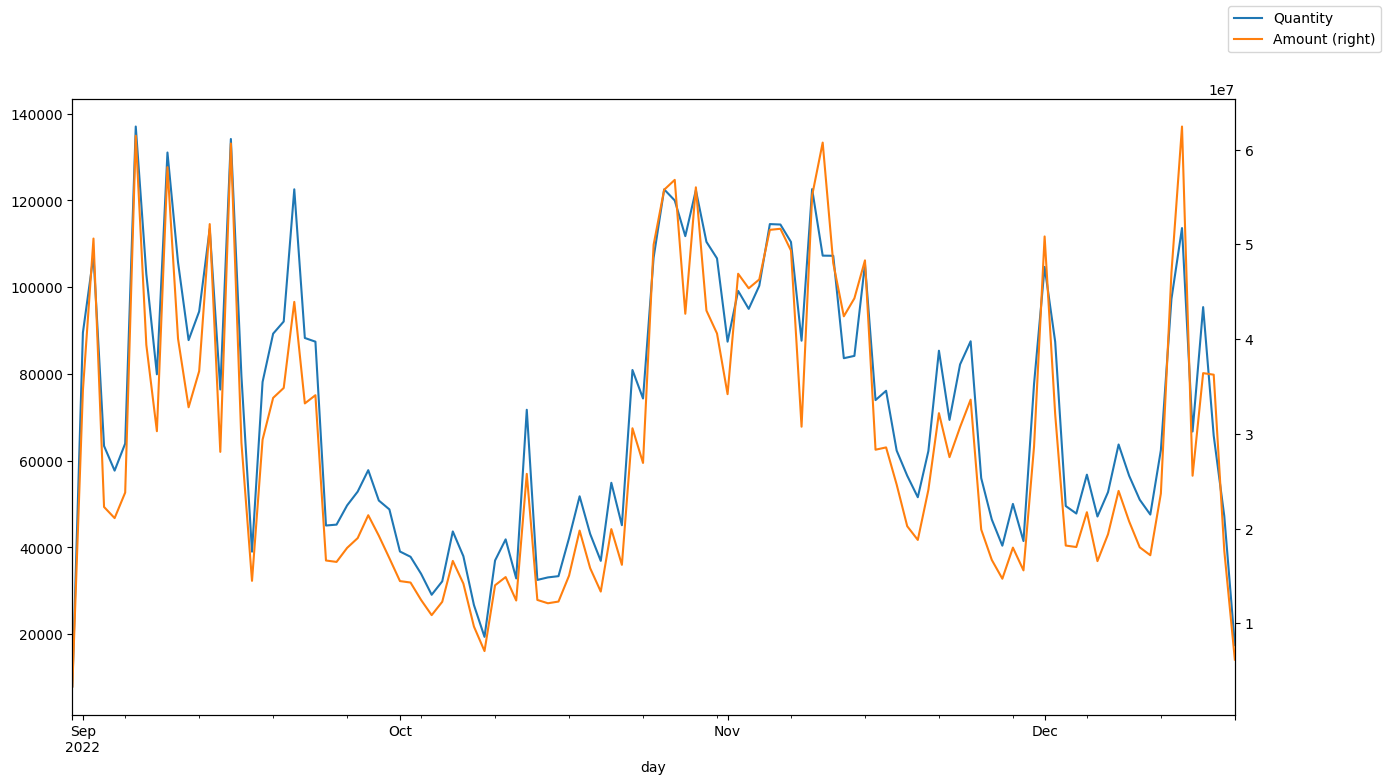

In [49]:
#Creation of a new dataframe containing only the dates and the amounts transfered
Result = Df[["Value", "day"]]
#Regroup of the amounts by day (We do a sum as grouping function)
Result_amount = Result.groupby("day")["Value"].sum()
Result_Quantity = Result.groupby("day")["Value"].count()
#We then plot the amount transfered by day that we just created
fig, ax = plt.subplots(figsize=(15,8))
Amount = Result_Quantity.plot(label = "Quantity")
Quantity = Result_amount.plot(label = "Amount", secondary_y=True)
fig.legend()

In [117]:
Result_Quantity.head().index

Index(['0xc4ed6555018d4360f983bf43937e584000b1951f',
       '0xdcac4f778fb2f7157e46008787c9f12d97f4714a',
       '0xacc066d74a3fd7fafd9149fc18f400c1d085614e',
       '0x649bb76ce390a5adbc7d04211a25b27a1688f2e4',
       '0x340c613bddddfef95988b9ec1583d44f71f6b23b'],
      dtype='object', name='origin_from_address')

<class 'pandas.core.frame.DataFrame'>
Index: 275055 entries, 0x000000000000d34c44564053af35e4fe271d0caa to 0xffffffffff402b1b62421a978cf93a56453d1496
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Value   275055 non-null  int64
dtypes: int64(1)
memory usage: 4.2+ MB
None
                                              Value
origin_from_address                                
0xc4ed6555018d4360f983bf43937e584000b1951f  1317891
0xdcac4f778fb2f7157e46008787c9f12d97f4714a   841121
0xacc066d74a3fd7fafd9149fc18f400c1d085614e   518410
0x649bb76ce390a5adbc7d04211a25b27a1688f2e4   379703
0x340c613bddddfef95988b9ec1583d44f71f6b23b   221622


C:\Users\vlist\AppData\Local\Temp\ipykernel_33684\3739101517.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(Result_Quantity.head().index,rotation=10)
C:\Users\vlist\AppData\Local\Temp\ipykernel_33684\3739101517.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(Result_amount.head().index,rotation=10)


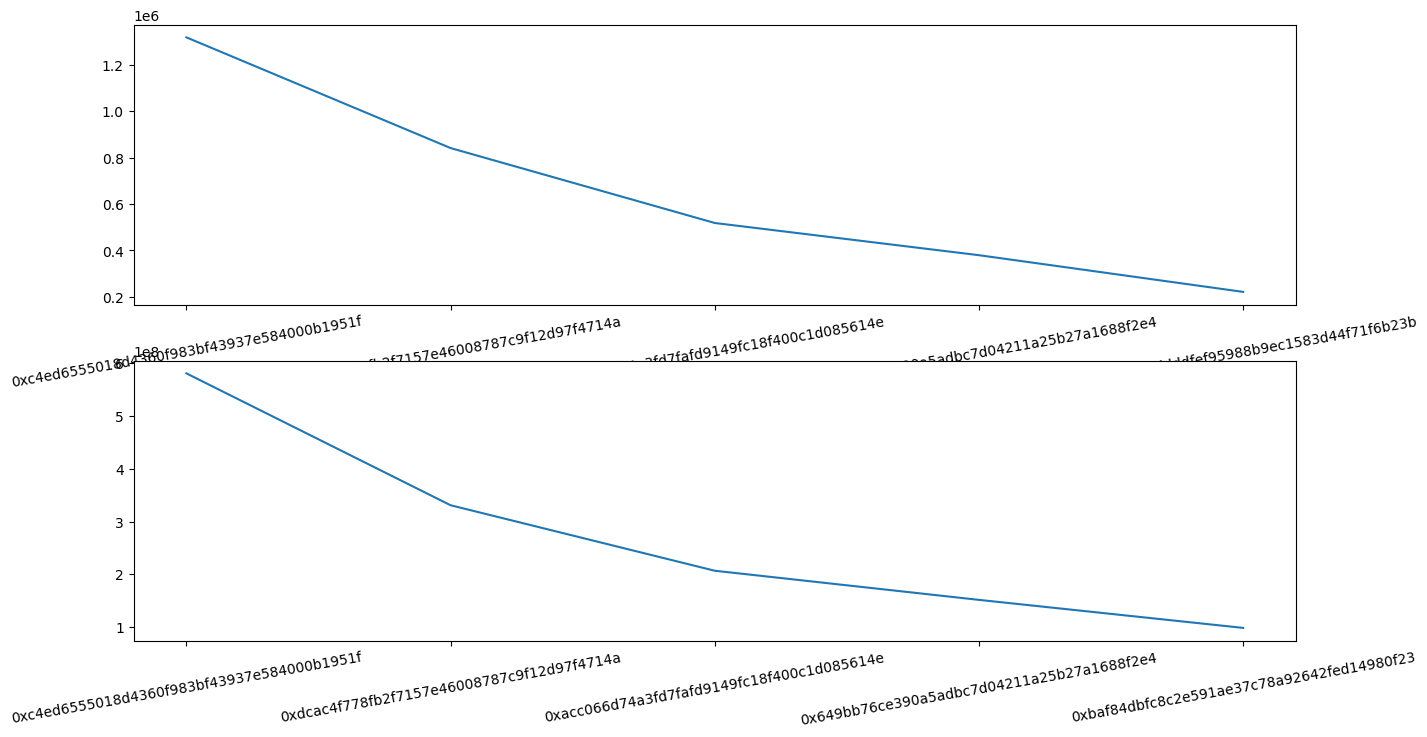

In [136]:
#Creation of a new dataframe containing only the dates and the amounts transfered
Result = Df[["Value", "origin_from_address"]]
#Regroup of the amounts by day (We do a sum as grouping function)
Result_amount = Result.groupby("origin_from_address").agg(Value=('Value', np.sum))
Result_amount.sort_values(by="Value", ascending=False, inplace=True)
Result_Quantity = Result.groupby("origin_from_address").agg(Value=('Value', 'count'))
print(Result_Quantity.info())
Result_Quantity.sort_values(by="Value", ascending=False, inplace=True)
print(Result_Quantity.head())
#We then plot the amount transfered by day that we just created
fig, axs = plt.subplots(2,1,figsize=(15,8))
axs[0].plot(Result_Quantity.head().index, Result_Quantity.head()["Value"])
axs[1].plot(Result_amount.head().index, Result_amount.head()["Value"])
axs[0].set_xticklabels(Result_Quantity.head().index,rotation=10)
axs[1].set_xticklabels(Result_amount.head().index,rotation=10)
plt.show()